In [72]:
import numpy as np 
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

Path.cwd()

PosixPath('/home/francesco/FisMedLab/Spettroscopiagamma')

In [73]:
Cs137cal = np.loadtxt('Cs137cal2.Spe')
Ba133cal = np.loadtxt('Ba133cal.Spe')
Am241cal = np.loadtxt('Am241cal.Spe')
Co60cal = np.loadtxt('Co60cal.Spe')
Na22cal = np.loadtxt('Na22cal.Spe')

back=np.loadtxt('fondo.Spe')


In [74]:
x=np.linspace(1,2048,2048)

#NORMALIZZO TUTTO
Cs137cal_norm= Cs137cal / (np.max(Cs137cal)*770)
Ba133cal_norm= Ba133cal /( np.max(Ba133cal)*564)
Co60cal_norm= Co60cal / (np.max(Co60cal)*2230)
Am241cal_norm= Am241cal / (np.max(Am241cal)*102)
Na22cal_norm= Na22cal / (np.max(Na22cal)*2063)

back_norm= back / (np.max(back)*92163)

Cs137clean=Cs137cal_norm-back_norm
Am241clean=Am241cal_norm-back_norm
Co60clean=Co60cal_norm-back_norm
Ba133clean=Ba133cal_norm-back_norm
Na22clean=Na22cal_norm-back_norm


E=[]
dE=[]
s=[]
ds=[]
cov12=[]

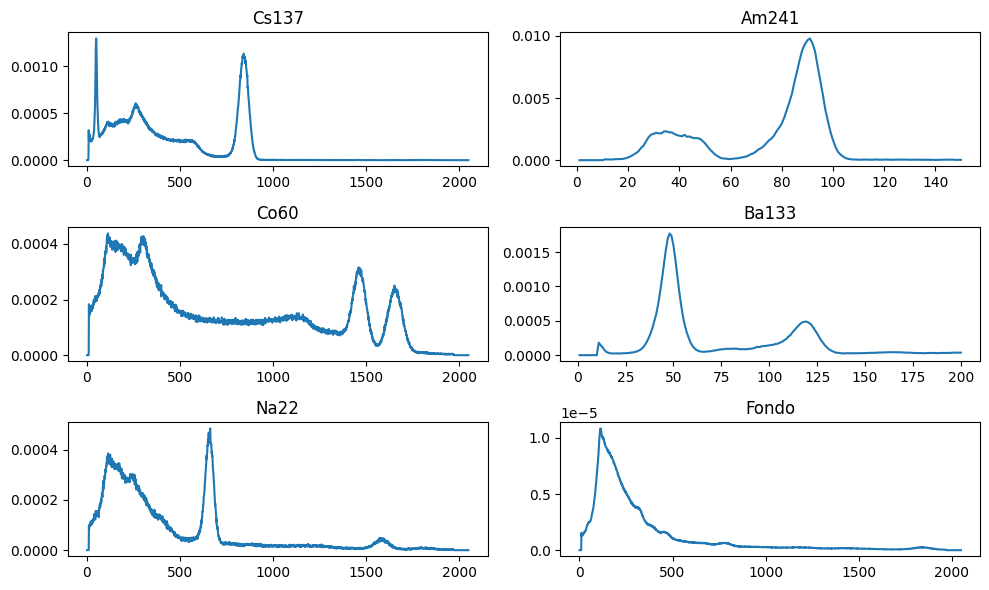

In [75]:
fig, ax=plt.subplots(3,2,figsize=(10,6))
ax[0,0].plot(x,Cs137clean)
ax[0,0].set_title('Cs137')
ax[0,1].plot(x[0:150],Am241clean[0:150])
ax[0,1].set_title('Am241')
ax[1,0].plot(x,Co60clean)
ax[1,0].set_title('Co60')
ax[1,1].plot(x[0:200],Ba133clean[0:200])
ax[1,1].set_title('Ba133')
ax[2,0].plot(x,Na22clean)
ax[2,0].set_title('Na22')
ax[2,1].plot(x,back_norm)
ax[2,1].set_title('Fondo')
plt.tight_layout()

Americio

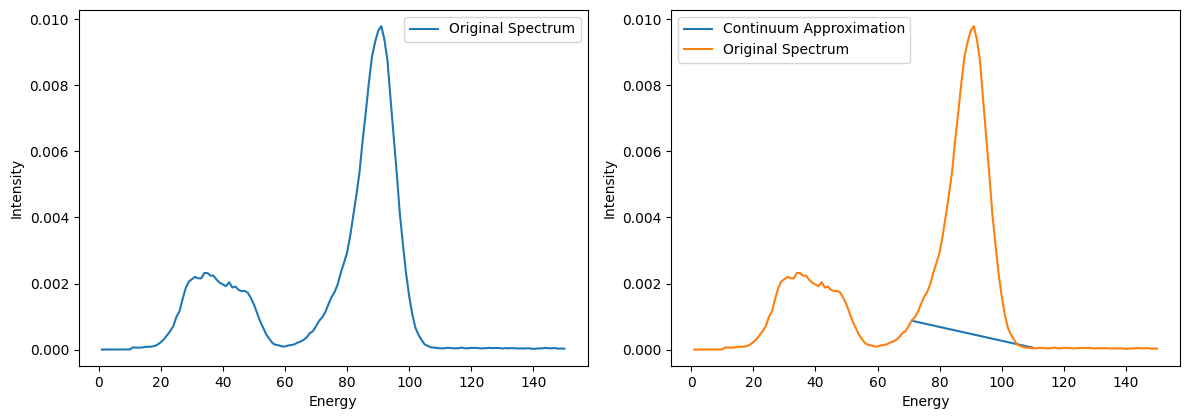

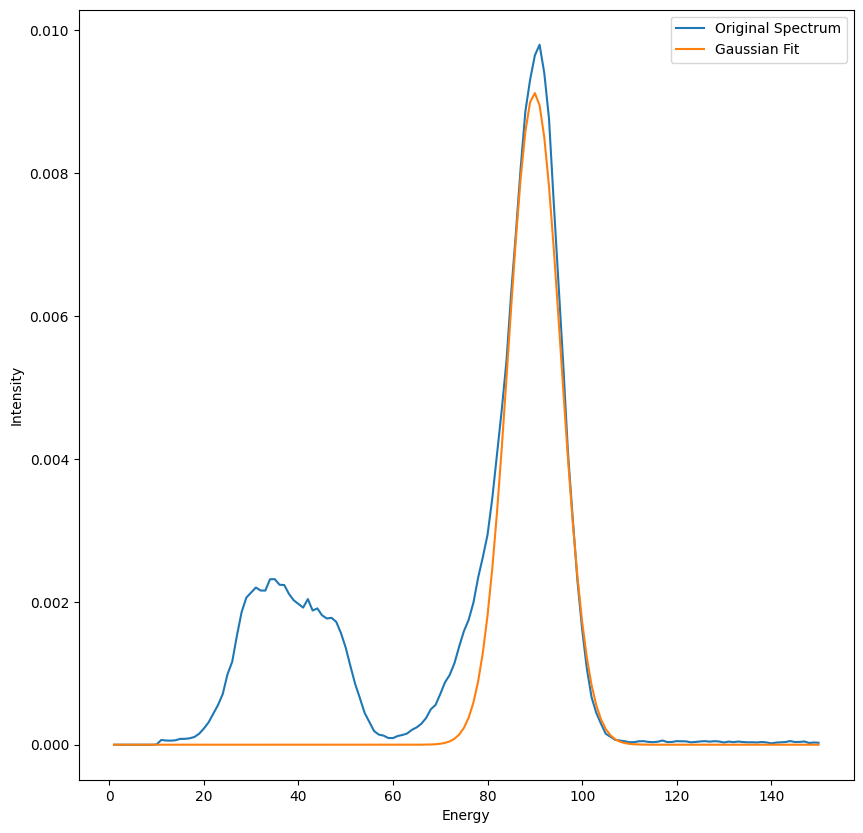

[5.51902955]


In [76]:
x=np.linspace(1,2048,2048)

x=x[0:150]
energy=x
Am241clean=Am241clean[0:150]
intensity=Am241clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 70
Cb_index = 110

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)

E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(s)




Cobalto

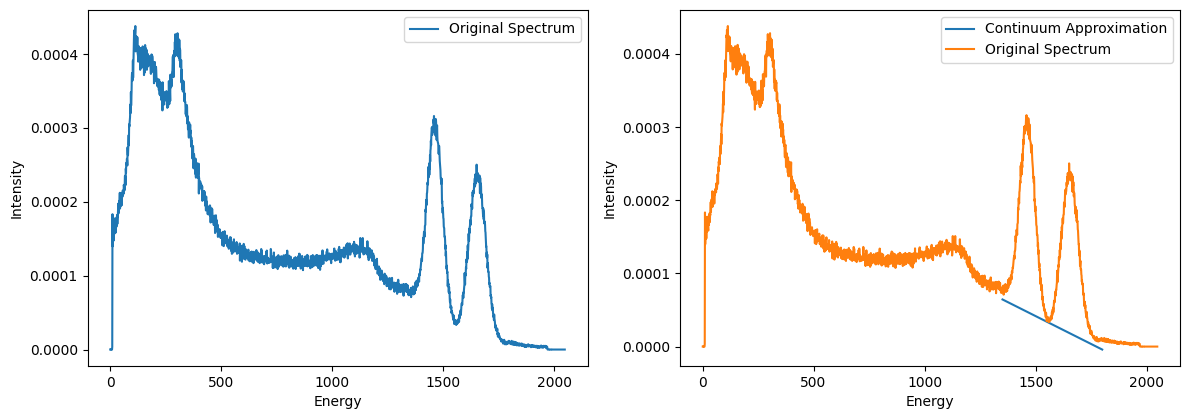

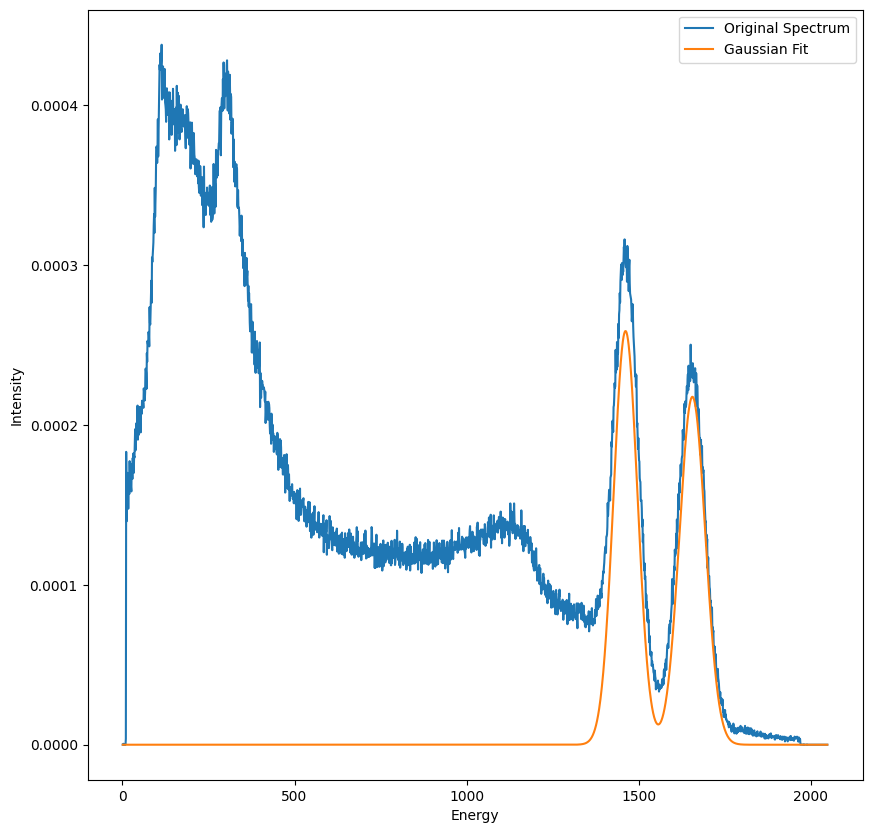

[ 5.51902955 34.65261043 37.5802619 ]


In [77]:
x=np.linspace(1,2048,2048)

energy=x
Co60clean=Co60clean
intensity=Co60clean


def gaussian(x, amplitude1, mean1, stddev1, amplitude2, mean2, stddev2):
    return amplitude1 * np.exp(-(x - mean1)**2 / (2 * stddev1**2)) + amplitude2 * np.exp(-(x - mean2)**2 / (2 * stddev2**2))

Ca_index = 1350
Cb_index = 1800

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = (Ca_intensity-0.000015) + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [0.0003, 1450, 20,0.00028,1600,20]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit1, mean_fit1, stddev_fit1,amplitude_fit2,mean_fit2,stddev_fit2 = fit_params
gaussian_fit = gaussian(energy, amplitude_fit1, mean_fit1, stddev_fit1,amplitude_fit2,mean_fit2,stddev_fit2)

E=np.append(E,mean_fit1)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit1)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])


E=np.append(E,mean_fit2)
dE=np.append(dE,np.sqrt(cov[4,4]))
s=np.append(s,stddev_fit2)
ds=np.append(ds,np.sqrt(cov[5,5]))
cov12=np.append(cov12,cov[4,5])





plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(s)

Cesio

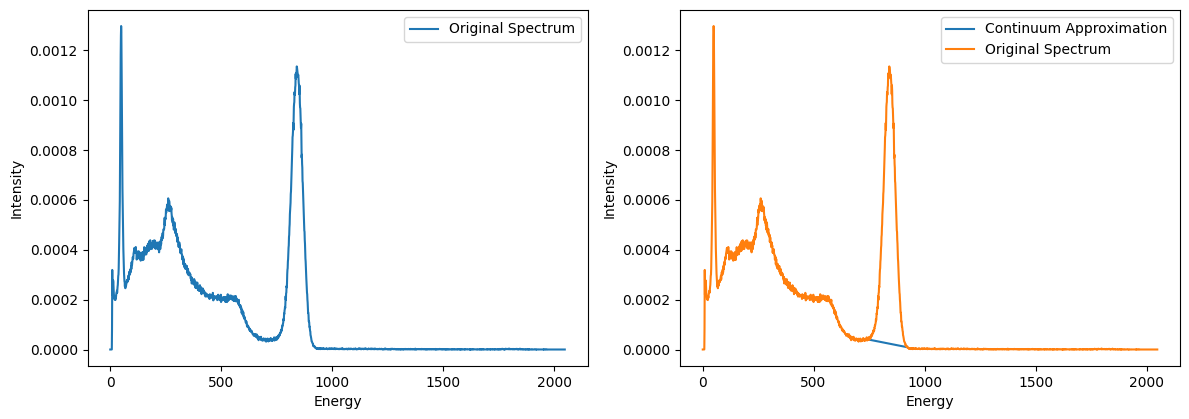

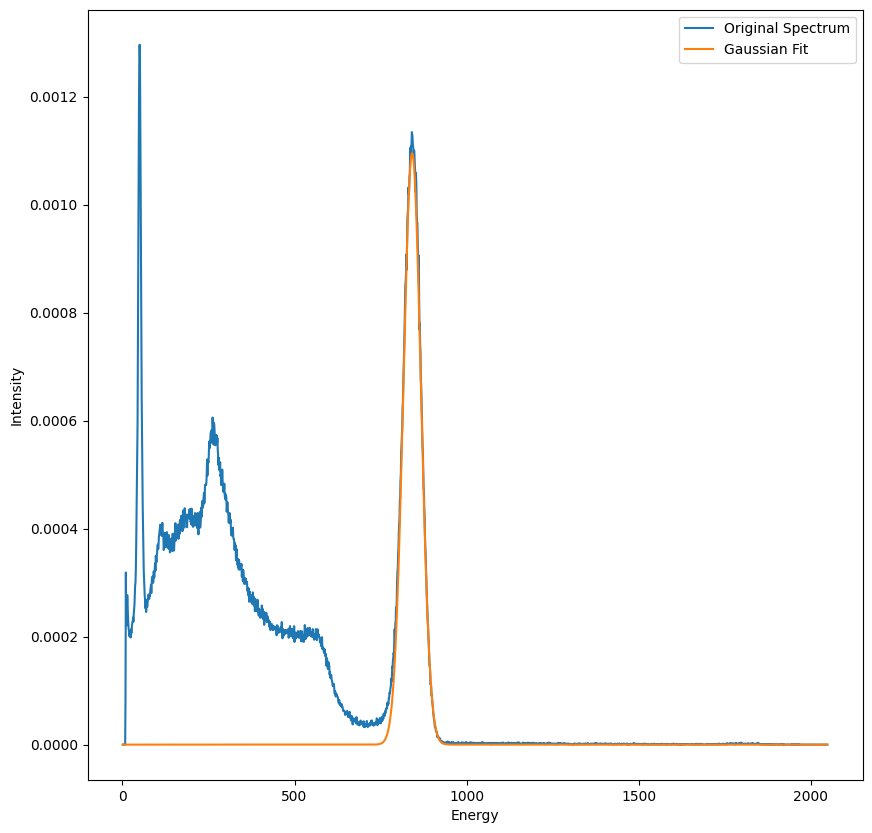

[ 5.51902955 34.65261043 37.5802619  25.51456172]


In [78]:
x=np.linspace(1,2048,2048)


energy=x
Cs137clean=Cs137clean
intensity=Cs137clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 750
Cb_index = 920

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(s)

Sodio

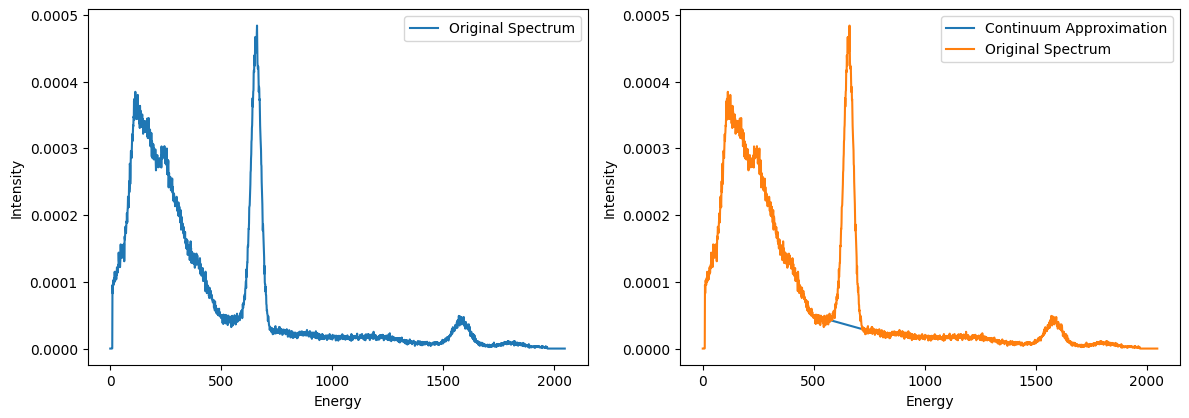

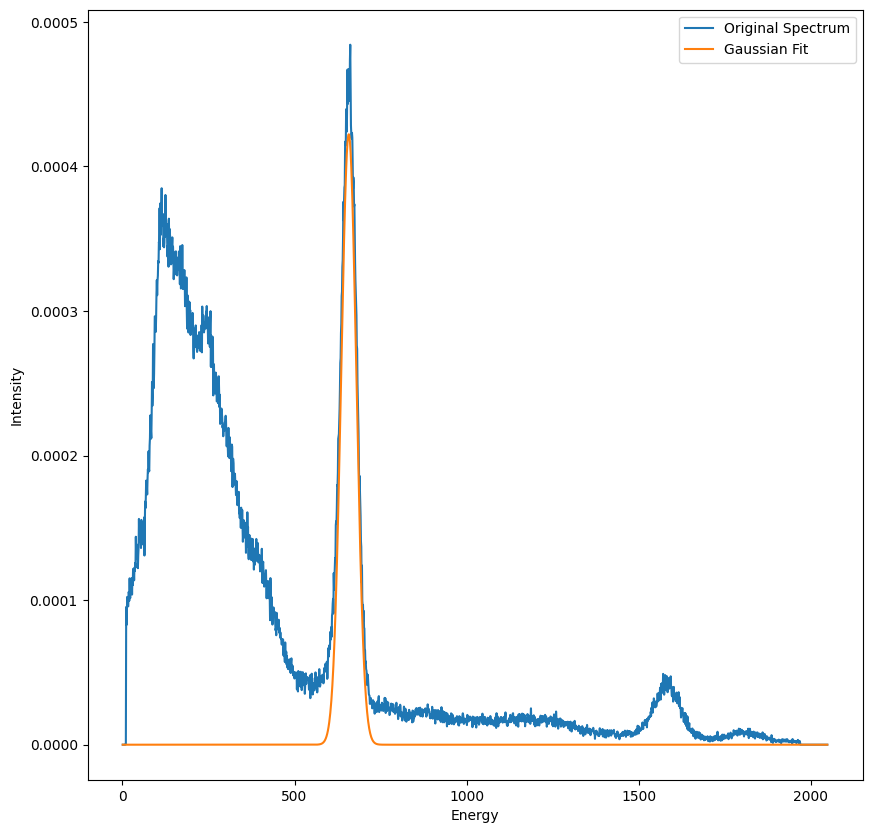

[ 5.51902955 34.65261043 37.5802619  25.51456172 22.05908146]


In [79]:
x=np.linspace(1,2048,2048)


x=x
energy=x
Na22clean=Na22clean
intensity=Na22clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 500
Cb_index = 750

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()
print(s)

Sodio picco 2

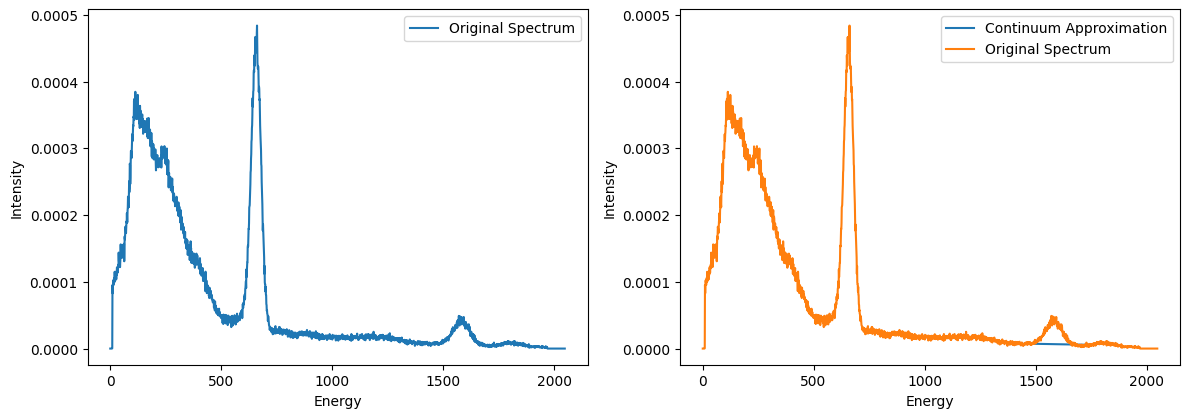

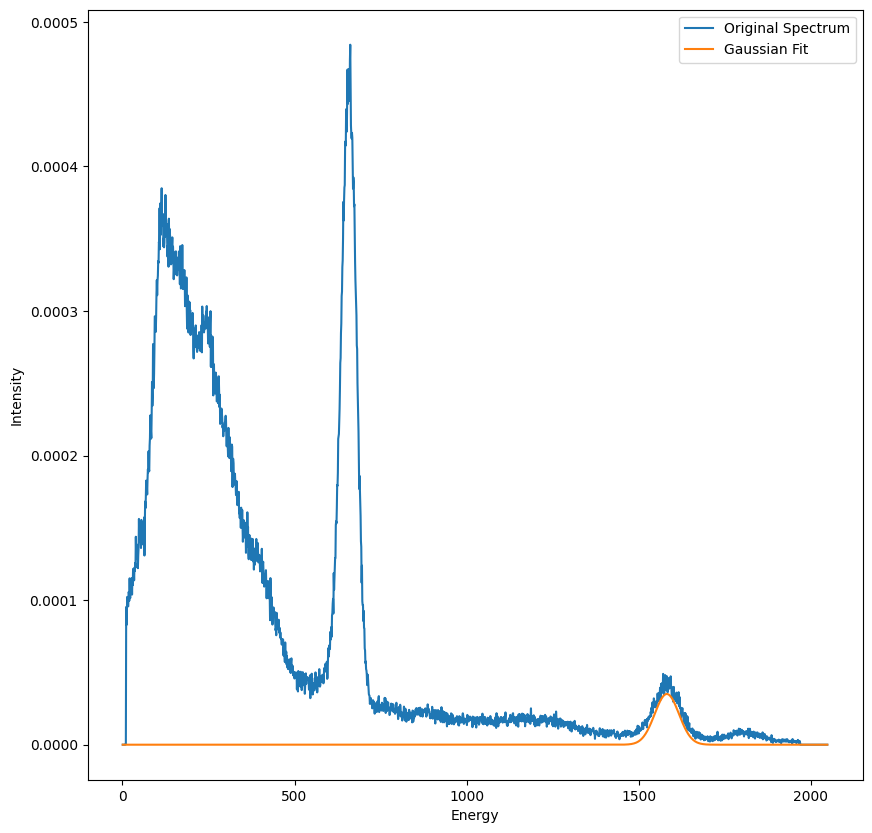

[ 5.51902955 34.65261043 37.5802619  25.51456172 22.05908146 35.22294104]


In [80]:
x=np.linspace(1,2048,2048)


x=x
energy=x
Na22clean=Na22clean
intensity=Na22clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 1450
Cb_index = 1750

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()
print(s)

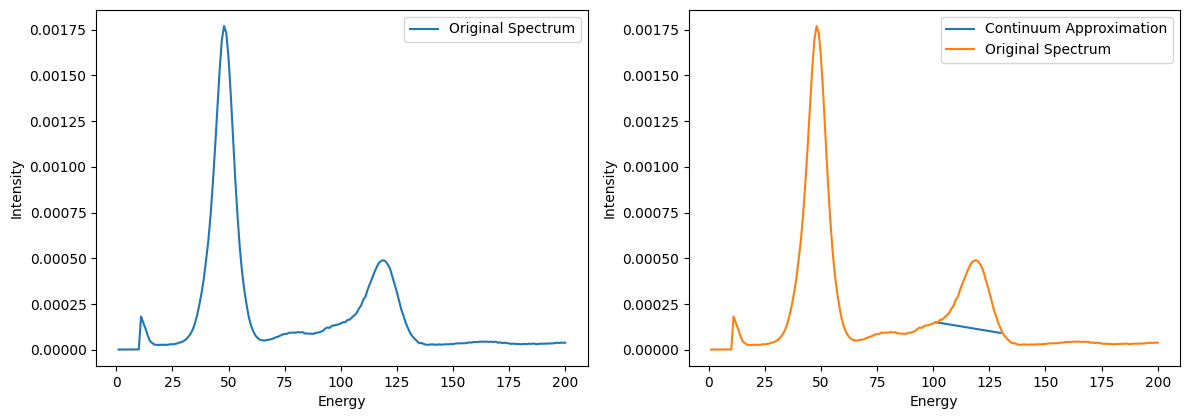

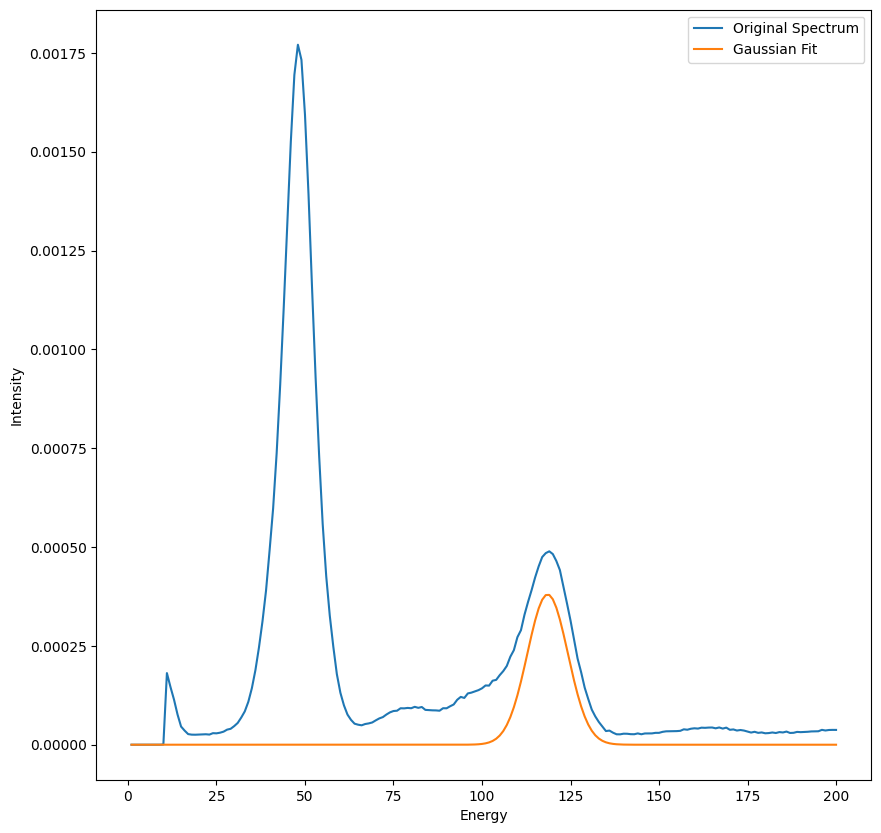

[ 5.51902955 34.65261043 37.5802619  25.51456172 22.05908146 35.22294104
  5.72293667]


In [81]:
x=np.linspace(1,2048,2048)


x=x[0:200]
energy=x
Ba133clean=Ba133clean[0:200]
intensity=Ba133clean


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))

Ca_index = 100
Cb_index = 130

Ca_intensity = intensity[Ca_index]
Cb_intensity = intensity[Cb_index]

continuum_slope = (Cb_intensity - Ca_intensity) / (Cb_index - Ca_index)

continuum_approximation = Ca_intensity + continuum_slope * (energy - energy[Ca_index])
continuum_approximation[:Ca_index] = 0
continuum_approximation[Cb_index:] = 0

subtracted_spectrum = intensity - continuum_approximation
subtracted_spectrum[:Ca_index] = 0
subtracted_spectrum[Cb_index:] = 0

initial_params = [np.max(subtracted_spectrum), (Ca_index + Cb_index) / 2, 1.0]
fit_params, cov = curve_fit(gaussian, energy, subtracted_spectrum, p0=initial_params)
amplitude_fit, mean_fit, stddev_fit = fit_params
gaussian_fit = gaussian(energy, amplitude_fit, mean_fit, stddev_fit)


E=np.append(E,mean_fit)
dE=np.append(dE,np.sqrt(cov[1,1]))
s=np.append(s,stddev_fit)
ds=np.append(ds,np.sqrt(cov[2,2]))
cov12=np.append(cov12,cov[1,2])



plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(energy[Ca_index:Cb_index], continuum_approximation[Ca_index:Cb_index], label='Continuum Approximation')
plt.plot(energy, intensity, label='Original Spectrum')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()

# Subtracted Spectrum
#plt.subplot(2, 2, 3)
#plt.plot(energy, subtracted_spectrum, label='Subtracted Spectrum')
#plt.xlabel('Energy')
#plt.ylabel('Intensity')
#plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, gaussian_fit, label='Gaussian Fit')
plt.xlabel('Energy')
plt.ylabel('Intensity')
plt.legend()
plt.show()

print(s)

TO do :
Linearità ale e basse energie
Calibrazione
Risoluzione

Calibration

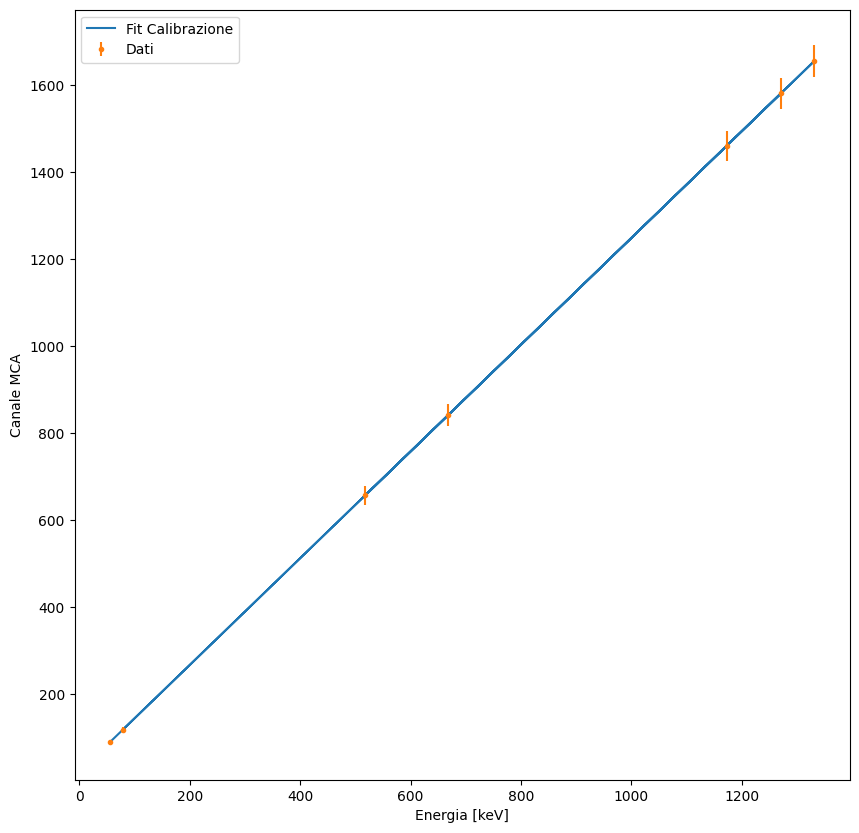

Chi-squared: 0.01
Reduced chi-squared: 0.00
Energia Calibrata :  [  54.99410199 1172.86915027 1331.20316716  667.72640477  517.59945939
 1270.68816539   78.30955117]
[  0.81488769 -18.28415865]
[3.04811743e-03 3.36763852e+00]


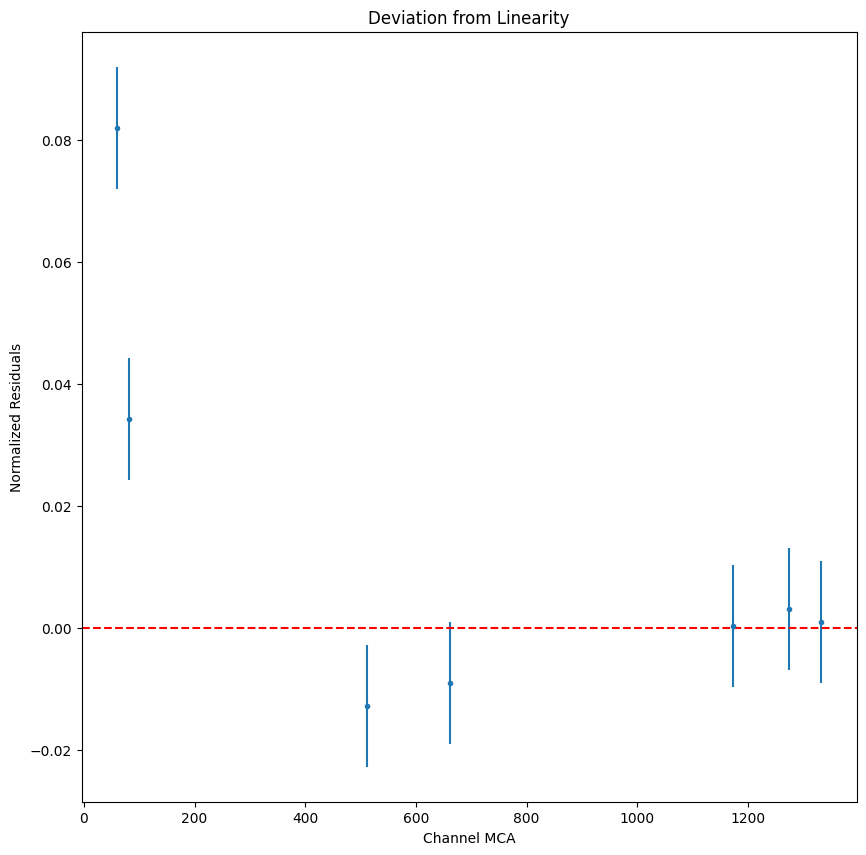

In [82]:
E_id=[59.5,1173.2,1332.5,661.66,511,1274.54,80.99]

errperc=s/E

def linear(x,m,q):
    return m*x+q




popt1,covt=curve_fit(linear,E,E_id,absolute_sigma=False) 

plt.plot(linear(E,*popt1),E,label='Fit Calibrazione')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Canale MCA')

plt.errorbar(linear(E,*popt1),E,yerr=s,fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = E_id - linear(E,*popt1)
chi2 = np.sum((residuals / linear(E,*popt1)) ** 2)
dof = len(E) - len(popt1)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',linear(E,*popt1))
#print('Errore Energia Calibrata:  ',R_E*linear(E,*popt1))
#
#print('Errore Risoluzione : ',errRes)
residuals = (E_id - linear(E, *popt1)) / linear(E, *popt1)

print(popt1)
print(np.sqrt(np.diag(covt)))
Ecal=np.array(linear(E,*popt1))

# Plot the normalized residuals
plt.errorbar(E_id, residuals,yerr=0.01, fmt='.')
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Channel MCA')
plt.ylabel('Normalized Residuals')
plt.title('Deviation from Linearity')
plt.show()

/home/francesco/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


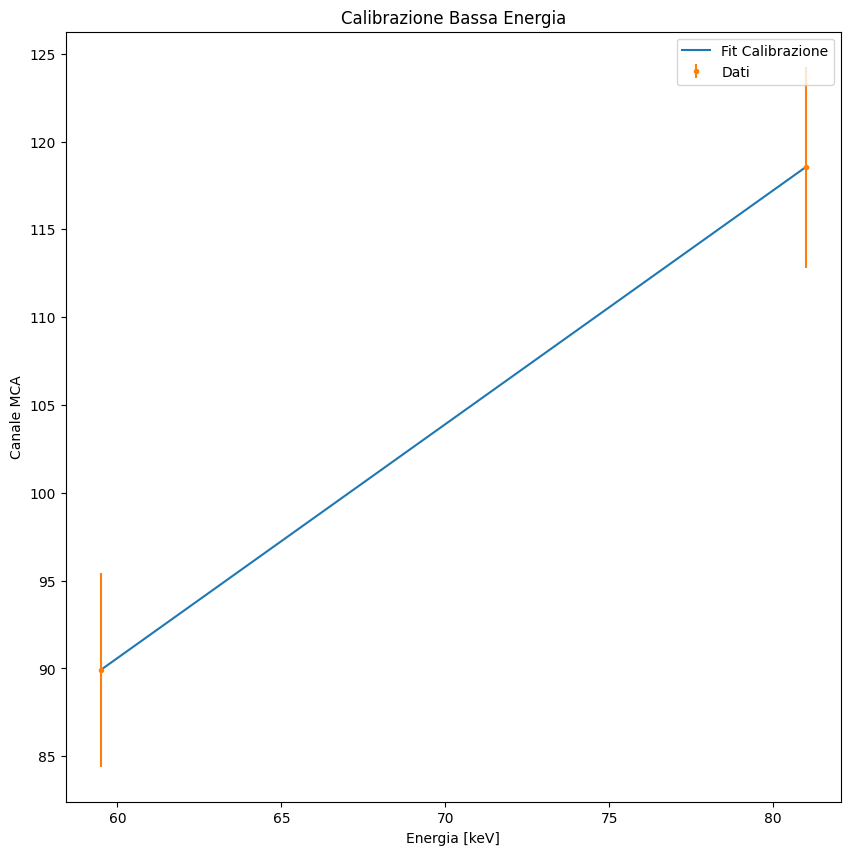

Chi-squared: 0.00
Reduced chi-squared: inf
Energia Calibrata :  [59.5  80.99]
[ 0.75108724 -8.0410458 ]


/tmp/ipykernel_260143/39461086.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  reduced_chi2 = chi2 / dof


In [83]:

En=np.array([E[0],E[6]])

E_id=np.array([59.5,80.99])

sn=np.array([s[0],s[6]])
def linear(x,m,q):
    return m*x+q




poptl,covt=curve_fit(linear,En,E_id,absolute_sigma=False) 

plt.title('Calibrazione Bassa Energia')

plt.plot(linear(En,*poptl),En,label='Fit Calibrazione')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Canale MCA')

plt.errorbar(linear(En,*poptl),En,yerr=sn,fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = E_id - linear(En,*poptl)
chi2 = np.sum((residuals / linear(En,*poptl)) ** 2)
dof = len(En) - len(poptl)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',linear(En,*poptl))
#print('Errore Energia Calibrata:  ',R_E*linear(E,*poptl))
#
#print('Errore Risoluzione : ',errRes)
residuals = (E_id - linear(En, *poptl)) / linear(En, *poptl)

print(poptl)

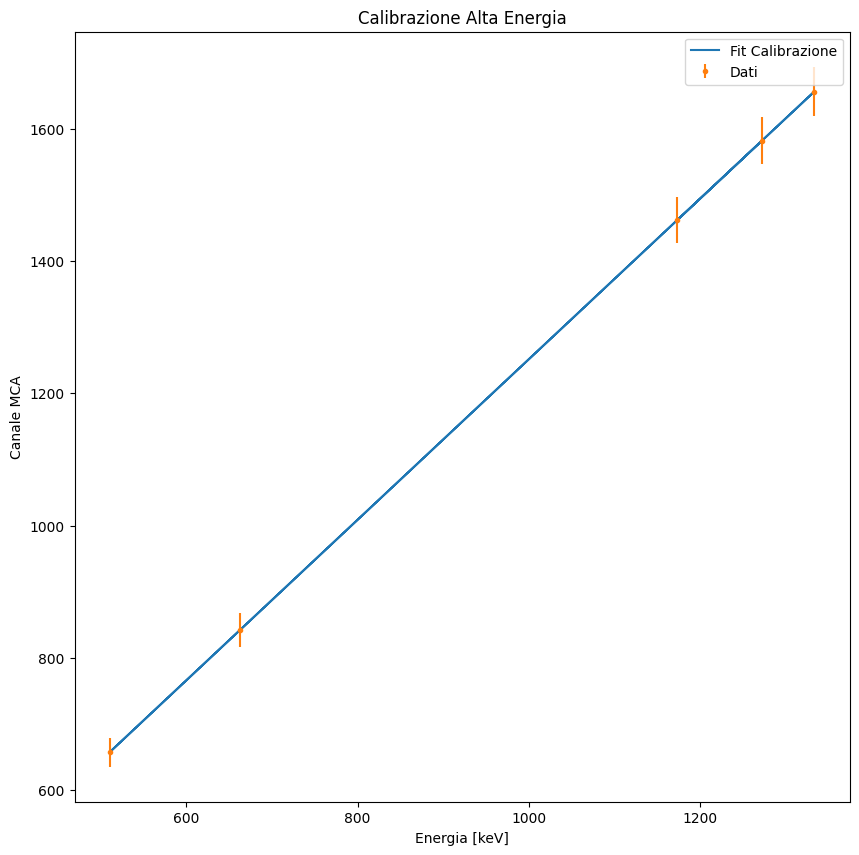

Chi-squared: 0.00
Reduced chi-squared: 0.00
Energia Calibrata :  [1173.60323999 1333.83826011  662.39560703  510.46619485 1272.59669802]
[  0.82467146 -31.85139431]


In [84]:
Ea=np.array([E[1],E[2],E[3],E[4],E[5]])

E_id=[1173.2,1332.5,661.66,511,1274.54]

sa=np.array([s[1],s[2],s[3],s[4],s[5]])

popth,covt=curve_fit(linear,Ea,E_id,absolute_sigma=False)


plt.title('Calibrazione Alta Energia') 

plt.plot(linear(Ea,*popth),Ea,label='Fit Calibrazione')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Canale MCA')

plt.errorbar(linear(Ea,*popth),Ea,yerr=sa,fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = E_id - linear(Ea,*popth)
chi2 = np.sum((residuals / linear(Ea,*popth)) ** 2)
dof = len(Ea) - len(popth)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',linear(Ea,*popth))
#print('Errore Energia Calibrata:  ',R_E*linear(E,*popth))
#
#print('Errore Risoluzione : ',errRes)
residuals = (E_id - linear(Ea, *popth)) / linear(Ea, *popth)

print(popth)


3593.6646083325536


/tmp/ipykernel_260143/1287588970.py:9: RuntimeWarning: invalid value encountered in sqrt
  return a*np.sqrt(d/x)+b


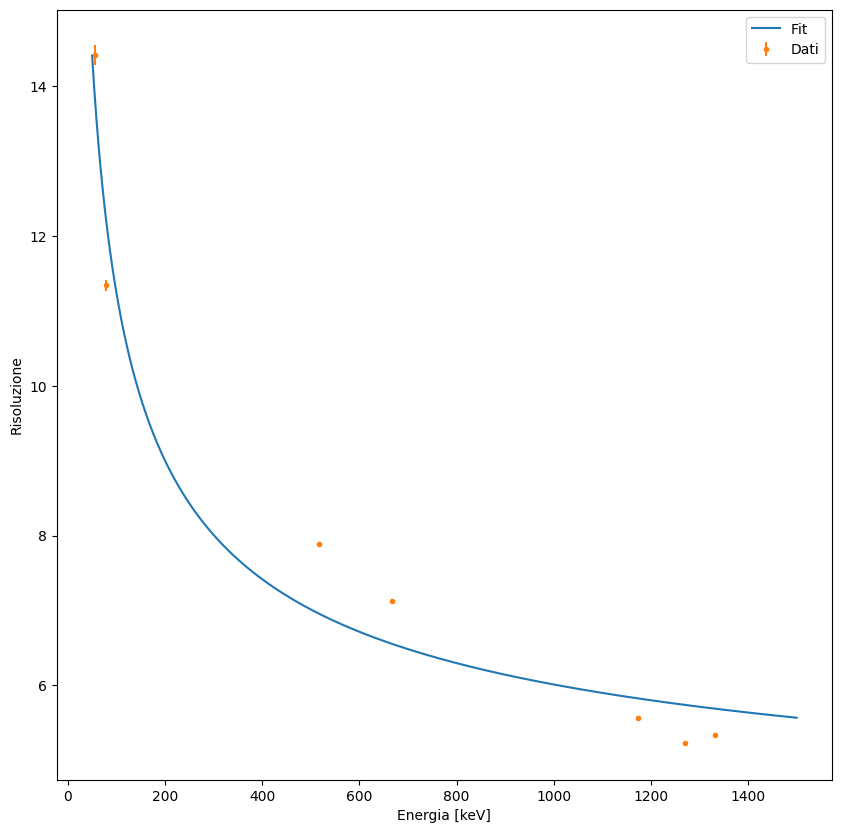

Chi-squared: 0.05
Reduced chi-squared: 0.01
Energia Calibrata :  [13.90799711  5.82698604  5.68995726  6.55361205  6.95559747  5.73929699
 12.23718338]


In [85]:



R_B=100*2.35*(s/E)
errR_B=(100*2.35*np.sqrt((ds/E)**2 + (s*dE/E**2)**2)- 2*s/E**3*cov12)
E_id=linear(E,*popt1)




def funcris(x,a,b,d):
    return a*np.sqrt(d/x)+b


popt2,covt=curve_fit(funcris,E_id,R_B,absolute_sigma=True)
print(popt2[2]/0.00762)
 

x=np.linspace(50,1500,1000)

plt.plot(x,funcris(x,*popt2),label='Fit ')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Risoluzione')

plt.errorbar(E_id,R_B,yerr=errR_B,fmt='.',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = R_B - funcris(E_id,*popt2)
chi2 = np.sum((residuals / funcris(E_id,*popt2)) ** 2)
dof = len(E_id) - len(popt2)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',funcris(E_id,*popt2))



[  59.5        1173.60323999 1333.83826011  662.39560703  510.46619485
 1272.59669802   80.99      ]


/tmp/ipykernel_260143/4093993321.py:14: RuntimeWarning: divide by zero encountered in divide
  return a/np.sqrt(x)+b


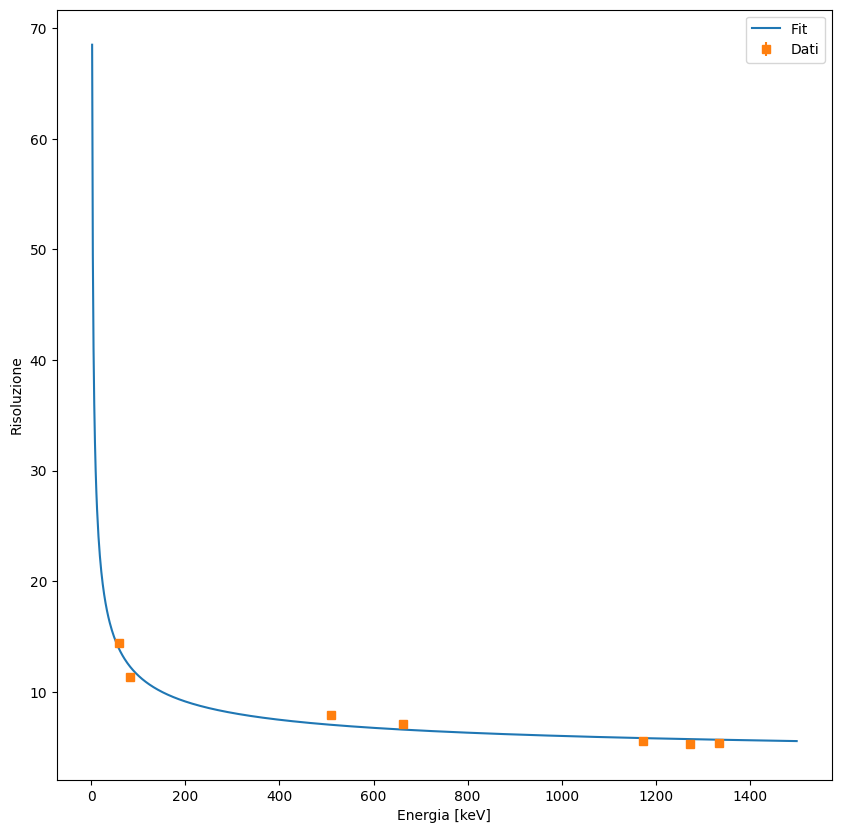

[ 0.61151686 -0.23486623 -0.3288565   0.54627115  0.87592452 -0.48059936
 -0.98939046]
Chi-squared: 0.04
Reduced chi-squared: 0.01
Energia Calibrata :  [13.81140286  5.80587592  5.66167264  6.57607256  7.00691277  5.7135621
 12.33520584]


In [86]:
Ea=linear(Ea,*popth) 
En=linear(En,*poptl)


errR_B=(100*2.35*np.sqrt((ds/E)**2 + (s*dE/E**2)**2)- 2*s/E**3*cov12)




Eris=np.array([En[0],Ea[0],Ea[1],Ea[2],Ea[3],Ea[4],En[1]])
print(Eris)

def funcris(x,a,b):
    return a/np.sqrt(x)+b

popt3,covt=curve_fit(funcris,Eris,R_B,absolute_sigma=False) 

x=np.linspace(0,1500,1000)

plt.plot(x,funcris(x,*popt3),label='Fit ')
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel('Energia [keV]')
plt.ylabel('Risoluzione')

plt.errorbar(Eris,R_B,yerr=errR_B,fmt='s',label='Dati')
plt.legend()
plt.show()


# Calculate the chi-squared value
residuals = R_B - funcris(Eris,*popt3)
print(residuals)
chi2 = np.sum((residuals / funcris(Eris,*popt3)) ** 2)
dof = len(Eris) - len(popt3)  # Degrees of freedom
reduced_chi2 = chi2 / dof
print('Chi-squared: {:.2f}'.format(chi2))
print('Reduced chi-squared: {:.2f}'.format(reduced_chi2))

print('Energia Calibrata : ',funcris(Eris,*popt3))